# Задание 2.

**NB. Все упражнения ниже нужно делать без использования циклов Python в явном (`while`, `for`) и неявном виде (list comprehension, `map`, `reduce` и пр)**

Задания по манипуляциям с массивами чаще всего решаются в одно/два выражения. 

In [5]:
%matplotlib inline

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

A = np.random.randint(0, 100, size=(200, 50))
A

array([[86, 42, 85, ..., 87, 58, 89],
       [87, 95, 57, ..., 43, 74, 44],
       [36, 94, 59, ..., 97, 59,  3],
       ...,
       [84, 57,  8, ..., 74, 76, 78],
       [75, 64, 82, ..., 73, 53, 73],
       [63, 99, 13, ..., 24, 24, 76]])

# Задание 2.1 (2 балла)

Сгенерируйте новый массив, в котором столбцы массива `A` переставлены в случайном порядке

In [2]:
B = A[:, np.random.permutation(A.shape[1])]
B

array([[80, 88, 76, ...,  4, 78, 21],
       [53, 33,  7, ...,  1, 59, 32],
       [73, 92,  7, ..., 65, 22, 29],
       ...,
       [46, 81, 62, ..., 91, 21, 57],
       [77, 30, 23, ..., 62, 58, 97],
       [68, 43, 93, ...,  9,  5, 35]])

# Задание 2.2 (5 баллов)

Сгенерируйте новый массив, который содержит только те строки массива `A`, в которых: 
- сумма элементов по четным столбцам (индексы $0, 2, \ldots$) больше среднего значения (по всему массиву) суммы элементов по нечетным столбцам (индексы $1, 3, \ldots$) 

In [3]:
С = A[np.sum(A[:, ::2], axis=1) > np.mean(np.sum(A[:, 1::2], axis=1))]
С

array([[68, 88, 19, ..., 94, 21, 31],
       [69, 92, 88, ..., 77, 29, 73],
       [ 6, 29, 79, ..., 21, 46, 69],
       ...,
       [41, 90, 54, ..., 23, 79, 66],
       [69, 15, 52, ..., 73, 76, 99],
       [78, 81, 53, ..., 73, 57, 66]])

# Задача 2.3 (3 балла)

Найдите индекс строки массива `A`, в которой разница между максимальным и минимальным элементом максимальна

In [4]:
ind = np.argmax(np.max(A, axis=1) - np.min(A, axis=1))
ind

1

# Задание 2.4 (7 баллов)

Сгенерируйте массив той же размерности, что и `A`, но в котором каждый элемент заменен на его порядковый номер (начиная с 1) в отсортированном по возрастанию массиве из элементов `A`

Если `A` выглядит так:
$$
\begin{pmatrix}
12 & 14\\
1 & 2
\end{pmatrix}
$$
то результат должен быть
$$
\begin{pmatrix}
3 & 4\\
1 & 2
\end{pmatrix}
$$

*Tip: рассмотрите возможность неоднократного применения [argsort()](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.argsort.html)*

In [5]:
# test = np.array([[12, 1], [2, 14]])
# Получить порядок сортировки массива -> получить порядковые номера для элементов исходного массива -> восстановить форму матрицы -> добавить единицу
np.argsort(np.argsort(A, axis=None)).reshape(A.shape)+1

array([[6896, 8812, 2001, ..., 9403, 2190, 3180],
       [7228, 3416, 8382, ..., 4024, 3313,  626],
       [7001, 9190, 8824, ..., 7736, 2959, 7325],
       ...,
       [7863, 8193, 5312, ..., 7350, 5755, 6685],
       [ 730, 3083, 2471, ..., 7487, 9711, 1120],
       [1998, 4305, 2584, ..., 5715, 3558, 5450]])

# Задание 2.5 (2 балла)

Примените $\min-\max$ - нормализацию к строкам массива `A`. То есть нужно получить новый массивы, в каждой строке которого максимальный элементы равен $1$, минимальный - $0$. 

In [13]:
# np.newaxis to reshape array to allow operations with rank ((n,m) - (n,1))/(n,1)
(A - np.min(A, axis=1)[:,np.newaxis]) / (np.max(A, axis=1) - np.min(A, axis=1))[:, np.newaxis]
# See Line 1 for demo

[96 99 95 96 97 95 93 97 98 99 92 98 97 95 96 99 98 98 98 98 97 96 95 99
 96 94 96 99 98 98 98 98 99 99 98 98 97 99 98 96 96 96 99 99 94 97 98 97
 99 97 92 97 95 95 98 99 91 97 98 97 98 96 99 99 99 96 96 95 95 95 92 98
 96 96 99 98 94 98 97 99 97 98 97 89 99 98 98 99 98 94 92 98 94 99 96 97
 96 96 98 98 96 98 96 94 92 90 95 98 96 98 98 96 94 97 96 92 99 99 93 98
 99 99 97 89 97 97 96 97 97 98 94 96 94 97 99 96 96 92 94 99 96 99 98 97
 93 94 98 97 96 97 91 95 96 93 97 95 97 96 95 98 93 96 98 98 93 99 97 97
 97 96 98 98 92 98 98 94 96 97 99 89 93 97 92 99 97 97 99 98 95 98 99 96
 95 95 99 94 99 96 95 91]


array([[0.67708333, 0.88541667, 0.16666667, ..., 0.94791667, 0.1875    ,
        0.29166667],
       [0.72727273, 0.33333333, 0.83838384, ..., 0.4040404 , 0.32323232,
        0.06060606],
       [0.70526316, 0.94736842, 0.90526316, ..., 0.78947368, 0.28421053,
        0.74736842],
       ...,
       [0.80208333, 0.83333333, 0.54166667, ..., 0.75      , 0.58333333,
        0.67708333],
       [0.04210526, 0.28421053, 0.22105263, ..., 0.74736842, 0.98947368,
        0.07368421],
       [0.18681319, 0.45054945, 0.25274725, ..., 0.59340659, 0.36263736,
        0.57142857]])

# Задание 2.6 (2 балла)

Сгенерируйте новый трехмерный массив, размерности $10 \times 200 \times 50$. Подмассивы по нулевой оси должны состоять из элементов `A`, умноженных на $1 - 10$ соответственно

In [82]:
# tA = np.array([[2,3],[4,5]])
# Lets use multiplication to solve this
# We need to add new axis to allow multiplication with (10,1,1) array
np.arange(1, 11).reshape(10, 1, 1) * A[None, :, :]

array([[[ 86,  42,  85, ...,  87,  58,  89],
        [ 87,  95,  57, ...,  43,  74,  44],
        [ 36,  94,  59, ...,  97,  59,   3],
        ...,
        [ 84,  57,   8, ...,  74,  76,  78],
        [ 75,  64,  82, ...,  73,  53,  73],
        [ 63,  99,  13, ...,  24,  24,  76]],

       [[172,  84, 170, ..., 174, 116, 178],
        [174, 190, 114, ...,  86, 148,  88],
        [ 72, 188, 118, ..., 194, 118,   6],
        ...,
        [168, 114,  16, ..., 148, 152, 156],
        [150, 128, 164, ..., 146, 106, 146],
        [126, 198,  26, ...,  48,  48, 152]],

       [[258, 126, 255, ..., 261, 174, 267],
        [261, 285, 171, ..., 129, 222, 132],
        [108, 282, 177, ..., 291, 177,   9],
        ...,
        [252, 171,  24, ..., 222, 228, 234],
        [225, 192, 246, ..., 219, 159, 219],
        [189, 297,  39, ...,  72,  72, 228]],

       ...,

       [[688, 336, 680, ..., 696, 464, 712],
        [696, 760, 456, ..., 344, 592, 352],
        [288, 752, 472, ..., 776, 472,  24

# Задание 2.7 (2 балла)

Создайте новый массив, такой же размерности, как и `A`, в котором сначала сгруппированы четные столбцы `A`, потом  нечетные. Используйте [np.concat()](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html)

In [20]:
np.concatenate((A[:, ::2], A[:, 1::2]), axis=1)

array([[62, 85, 87, ..., 67, 98, 28],
       [96, 30, 32, ..., 14, 44, 74],
       [80,  4, 26, ..., 15, 67, 29],
       ...,
       [ 6, 58,  0, ..., 44, 78, 61],
       [14, 90, 57, ..., 51, 60, 45],
       [54, 73, 74, ..., 20, 41,  0]])

# Задание 2.8 (2 балла)

Посчитайте количество строк массива `A`, в который все элементы больше 5. Используйте [np.all()](https://numpy.org/doc/stable/reference/generated/numpy.all.html) 

In [17]:
np.sum(np.all(A > 5, axis=1))

11

# Задание 2.9 (2 балла)

Поделите массив `A` горизонтально на 10 частей и создайте новый массив размерности $20 \times 50$, который является средним этих частей. Используйте [np.split()](https://numpy.org/doc/stable/reference/generated/numpy.split.html)

In [2]:
np.mean(np.split(A, 10, axis=0), axis=0)

NameError: name 'np' is not defined

# Задание 2.10 (4 балла)

"Разверните" массив `A` в одномерный массив. Оставьте в нём только уникальные элементы в том же порядке, в котором они встречаются в массиве. Используйте [np.unique()](https://numpy.org/doc/stable/reference/generated/numpy.unique.html)

In [36]:
unique, inx = np.unique(A, return_index=True)
print(unique[np.argsort(inx)])
# print(A[0, :])

[62 36 85 78 87 45 28 84 66 73 55 52 59 22 83 79 46 54 48 50 72 13 16  9
 58 10 63  6 60 38 75 24 90 35 34 67 98 15 96  4 30 32 44  7 37 23 53 76
  3 14  1 18  0 74 81 57 25 71  2 99 89 80 26 41 20  8 27  5 68 88 95 33
 11 77 40 91 31 29 93 82 97 12 61 19 51 39 65 42 86 56 17 21 92 47 69 43
 64 94 70 49]
[62 36 85 78 87 45 28 85 84 66 73 55 52 59 22 83 79 46 54 48 50 72 13 16
  9 13 59 58 10 63 46 58  6 60  9 38 52 75 66 24 90 87 35 16 34 67 85 98
 15 28]


# Задание 2.11 (3 балла)

Создайте одномерный массив размерности $200$, в котором каждый элемент - евклидово расстояние между соответствующей строкой `A` и "средней" строкой `A`

In [37]:
np.linalg.norm(A - np.mean(A, axis=0), axis=1)

array([181.7441737 , 217.07370793, 217.18615213, 216.60532005,
       201.18708874, 209.52755111, 211.80480324, 202.48546781,
       186.96241514, 226.02275256, 203.57633624, 216.94995892,
       198.1332498 , 198.51245471, 186.91959414, 229.97535667,
       221.90859532, 208.62189405, 200.15914837, 183.04935038,
       223.72135498, 222.4746158 , 206.42777108, 214.6828933 ,
       199.7822932 , 197.57908461, 208.16631494, 193.44121762,
       206.67274778, 206.51751663, 185.75302063, 198.41057098,
       223.52191095, 194.05778695, 204.03201875, 200.34439018,
       221.44804058, 189.15746   , 224.93902435, 181.85932661,
       198.72313573, 187.22079125, 184.12127708, 202.70136821,
       216.32000526, 192.93746312, 210.13377804, 223.89659371,
       198.08845164, 205.95721564, 209.75670353, 203.32160405,
       205.93157765, 207.52933449, 216.18412216, 220.8452958 ,
       194.54496826, 197.74376014, 202.5894239 , 218.3962332 ,
       208.78731924, 196.36999433, 173.9319254 , 212.05

# Задание 2.12 (2 балла)

Создайте новый массив, который состоит из элементов `A`, измененных по следующим правилам:
- если элемент меньше $50$, то он умножается на $2$
- в противном случае он умножается на $3$

Используйте [np.where()](https://numpy.org/doc/stable/reference/generated/numpy.where.html)

In [88]:
np.where(A < 50, A * 2, A * 3)

array([[210, 261, 150, ...,  82, 195, 153],
       [297, 225,  20, ...,  70, 279, 252],
       [ 62, 204, 228, ..., 228,  70,  40],
       ...,
       [210, 258, 255, ..., 204, 282, 186],
       [ 28,  56,  36, ...,  24, 243,  50],
       [ 90,  40, 270, ..., 180,  20, 186]])

# Задание 2.13 (7 баллов)

Разверните массив `A` в одномерный массив. Создайте три новых массива, подсчитав скользящие средние по окнам $3$, $5$, $10$. Найдите сумму этих массивов, выровнив из размерности нулями справа

*Tip: реализуйте функцию, которая считает скользящее среднее. Используйте [np.cumsum()](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html) или [np.convolve()](https://numpy.org/doc/stable/reference/generated/numpy.convolve.html)*

# Задание 2.14 (8 баллов)

Постройте график функции $$f(x) = (5  \sin(2x) - \cos^2(x) - 1 + |x^3| - x^2) / (x^2 + 1)$$  

и производной от этой функции.  Найдите минимум с помощью `scipy` и обозначьте его на графике. На этой же оси постройте графики скользящего среднего этой функции с окном $1$, $2$, $5$.

In [80]:
import sympy
from sympy import Symbol, sin, cos, Abs, lambdify, Derivative, im, re

sympy.init_printing()

def func(x):
    return (5 * np.sin(2 * x) - np.cos(x) ** 2 - 1 + np.abs(x ** 3) - x ** 2) / (x ** 2 + 1)

x = np.linspace(-10, 10, 10000)
sym_x = Symbol('x')
sym_f = (5 * sin(2 * sym_x) - cos(sym_x) ** 2 - 1 + Abs(sym_x ** 3) - sym_x ** 2) / (sym_x ** 2 + 1)
# Как тут лучше поступать с Derivative я не придумал ,поэтому просто заменил их нулями вручную, так как они все равно нулевые
sym_df = sym_f.diff(sym_x).subs(Derivative(im(sym_x), sym_x), 0).subs(Derivative(re(sym_x), sym_x), 0)

diff = lambdify(sym_x, sym_df, 'numpy')
f_min = sp.optimize.fmin_bfgs(func, 0)

Optimization terminated successfully.
         Current function value: -4.882074
         Iterations: 6
         Function evaluations: 16
         Gradient evaluations: 8


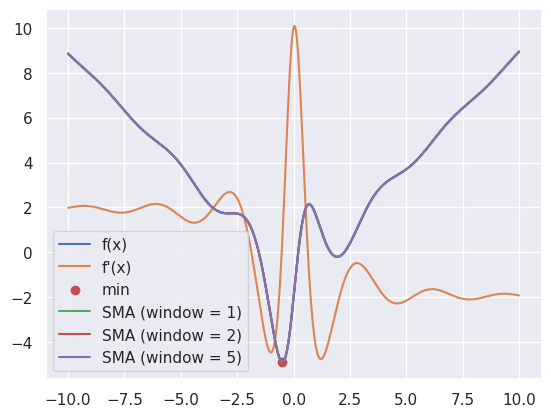

In [91]:
plt.plot(x, func(x), label='f(x)')
plt.plot(x, diff(x), label='f\'(x)')
plt.scatter(f_min, func(f_min), label='min', c='r')

for window_size in (1,2,5):
    # WTF - То что все SMA совпадают это норм вообще? Визуально тут сглаживать нечего, функция и так гладкая (так ведь?)
    # TODO - think more
    plt.plot(x[window_size-1:], np.mean(np.lib.stride_tricks.sliding_window_view(func(x), window_size), axis=1), label=f'SMA (window = {window_size})')

plt.legend()

# Задание 2.15 (10 баллов)

Есть следующий алгоритм семплинирования, на вход функции подается вектор из целых положительных чисел и число семплов.

In [48]:
from typing import List 

def sample(x: List[int], c: int) -> List[int]:
    assert len(x) > 0
    
    s = np.sum(x)
    res = []
    for _ in range(c):
        val = s * np.random.random()
        cur, idx = 0, 0        
        while cur + x[idx] <= val:
            cur += x[idx]
            idx += 1
            
        res.append(idx)
    return res

            
sample([50, 3, 1, 7, 20], 5)   

[0, 0, 3, 0, 0]

Реализуйте данный алгоритм более оптимальным способом на массивах `numpy`, без использования циклов. Проверьте корректность и идентичность алгоритмов семплирования с помощью статистических тестов.

In [49]:
import numpy as np

def npsample(x: np.ndarray, c: int) -> np.ndarray:
    assert len(x) > 0

    s = np.sum(x)
    cum_sum = np.cumsum(x)
    uniform_vals = s * np.random.random(c)
    res = np.searchsorted(cum_sum, uniform_vals)
    return res

sample(np.array([50, 3, 1, 7, 20]), 5)

[3, 0, 0, 0, 0]

In [76]:
import scipy.stats as stats

sample_size = 100
data = np.random.randint(1, 100, size=sample_size)

stat, p_value = stats.ttest_ind(sample(data, sample_size), npsample(data, sample_size), equal_var=False)
assert p_value > 0.05

# Задание 2.16 (5 баллов)

Есть следующий алгоритм "случайного блуждания"

In [93]:
import random 

def walk(n: int):
    cur_position = 0
    for i in range(n):
        cur_position += random.choice([-3, -1, 0, 2, 3])

    return cur_position

walk(10_000)

Реализуйте более эффективную версию с помощью `numpy`, сравните производительность (используя, например, magic `timeit`). Воспользовавшись [kdeplot()](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) или аналогами, постройте график распределения значений `walk(10_000)` на каком-то разумном числе запусков. 

In [101]:
def walk_upd(n: int):
    return np.cumsum(np.random.choice([-3, -1, 0, 2, 3], size=n))[-1]

In [95]:
# Numpy вариант существенно быстрее
%timeit walk(10_000)
%timeit walk_upd(10_000)

3.25 ms ± 307 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
124 µs ± 422 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


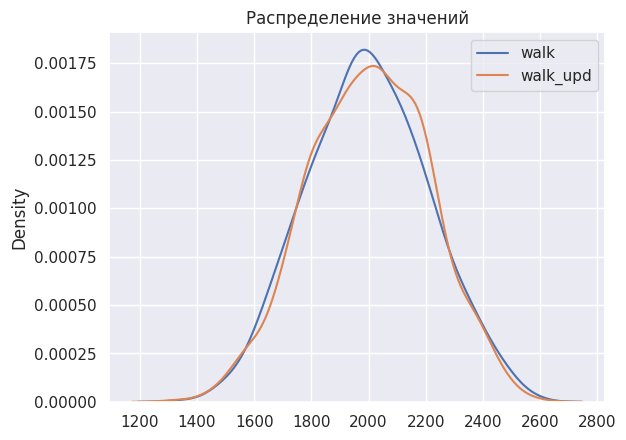

In [105]:
samples = [walk(10_000) for _ in range(1000)]
samples_upd = [walk_upd(10_000) for _ in range(1000)]

sns.kdeplot(samples)
sns.kdeplot(samples_upd)
plt.title("Распределение значений")
plt.legend(["walk", "walk_upd"])
plt.show()

# Задание 2.17 (5 баллов)

Имеется функция, которая проделывает достаточно странные манипуляции с массивом `numpy`

In [42]:
import numpy.typing as npt

def strange_conv(a: npt.NDArray[np.float64]) -> np.float64:
    x = a.shape[0]
    y = a.shape[1]

    t = 1.
    for y in range(y - 5):
        for x in range(x - 3):
            c = 1.5 * a[y+1, x+2] - a[y+5, x+3] * a[y, x] + 0.2 * a[y+4, x]
            t = 0.2 * t + 0.8 * c

    return t


a = np.random.random((10000, 10000))
strange_conv(a)

1.1814190450125897

Оптимизируйте данную функцию с помощью (2 на выбор):
- [Numba](https://numba.pydata.org)
- `Cython` (+5 баллов)
- [Taichi](https://github.com/taichi-dev/taichi) (+5 баллов)
- `Pythran `[[1]](https://pythran.readthedocs.io/en/latest/), [[2]](https://serge-sans-paille.github.io/pythran-stories/pythran-tutorial.html) (+2 балла)

Сравните производительность.

In [43]:
import numba as nb
import numpy as np
import numpy.typing as npt

@nb.njit()
def strange_conv_numba(a: npt.NDArray[np.float64]) -> np.float64:
    x = a.shape[0]
    y = a.shape[1]

    t = 1.
    for y in range(y - 5):
        for x in range(x - 3):
            c = 1.5 * a[y+1, x+2] - a[y+5, x+3] * a[y, x] + 0.2 * a[y+4, x]
            t = 0.2 * t + 0.8 * c

    return t

In [44]:
%load_ext cython

The cython extension is already loaded. To reload it, use:
  %reload_ext cython


In [45]:
%%cython -a
import numpy as np
cimport numpy as np

def strange_conv_cython(np.float64_t[:, :] a) -> np.float64_t:
    cdef int x = a.shape[0]
    cdef int y = a.shape[1]

    cdef double t = 1.
    cdef double c

    for y in range(y - 5):
        for x in range(x - 3):
            c = 1.5 * a[y+1, x+2] - a[y+5, x+3] * a[y, x] + 0.2 * a[y+4, x]
            t = 0.2 * t + 0.8 * c

    return t


In [46]:
import timeit

original_time = timeit.timeit(lambda: strange_conv(a), number=10)
numba_optimized_time = timeit.timeit(lambda: strange_conv_numba(a), number=10)
cython_optimized_time = timeit.timeit(lambda: strange_conv_cython(a), number=10)

print(f"Original time: {original_time}")
print(f"Numba optimized time: {numba_optimized_time}")
print(f"Cython optimized time: {cython_optimized_time}")

Original time: 80.9092929230028
Numba optimized time: 0.3277851350030687
Cython optimized time: 0.2962593599986576


In [47]:
# Let's verify that all 3 functions return the same result
print("Stange conv: ", strange_conv(a))
print("Stange conv numba: ", strange_conv_numba(a))
print("Stange conv cython: ", strange_conv_cython(a))


Stange conv:  1.1814190450125897
Stange conv numba:  1.1814190450125897
Stange conv cython:  1.1814190450125897
